In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.family'] = 'sans-serif'

%matplotlib inline

details = pd.read_csv('data/Storms/StormEvents_details-ftp_v1.0_d2016_c20170918.csv', sep=',')
fatalities = pd.read_csv('data/Storms/StormEvents_fatalities-ftp_v1.0_d2016_c20170918.csv', sep=',')
locations = pd.read_csv('data/Storms/StormEvents_locations-ftp_v1.0_d2016_c20170918.csv', sep=',')

details.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201607,15,1715,201607,15,1715,108769,651823,SOUTH CAROLINA,45,...,1.0,N,BOYD HILL,34.94,-81.03,34.94,-81.03,Scattered thunderstorms developed across the U...,One to two feet of deep standing water develop...,CSV
1,201607,15,1725,201607,15,1725,108769,651825,SOUTH CAROLINA,45,...,1.0,S,FT MILL,35.01,-80.93,35.01,-80.93,Scattered thunderstorms developed across the U...,NWS Columbia relayed a report of trees blown d...,CSV
2,201607,16,1246,201607,16,1246,108812,651828,NORTH CAROLINA,37,...,2.0,ENE,OLD FT,35.64,-82.14,35.64,-82.14,Scattered thunderstorms developed near the Blu...,Media reported two trees blown down along I-40...,CSV
3,201607,8,1755,201607,8,1755,105872,635287,TENNESSEE,47,...,1.0,W,JENA,35.65,-84.18,35.65,-84.18,The combination of summer heating and high low...,Numerous trees were reported down in the Green...,CSV
4,201607,8,1810,201607,8,1810,105872,635296,TENNESSEE,47,...,1.0,WSW,PITNER,35.87,-83.77,35.87,-83.77,The combination of summer heating and high low...,Numerous trees were reported down in Seymour. ...,CSV


In [8]:
fatalities.head()

,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,EVENT_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,201602,24,0,30075,619440,D,02/24/2016 00:00:00,78.0,M,Outside/Open Areas,201602
1,201603,9,0,30181,626789,D,03/09/2016 00:00:00,56.0,M,Outside/Open Areas,201603
2,201603,9,0,30182,626791,I,03/09/2016 00:00:00,28.0,F,Vehicle/Towed Trailer,201603
3,201603,8,0,30183,626794,I,03/08/2016 00:00:00,22.0,M,Vehicle/Towed Trailer,201603
4,201605,29,0,30551,627093,D,05/29/2016 00:00:00,20.0,M,In Water,201605


In [9]:
locations.head()

,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,201603,102667,615187,1,2.82,SSE,ANTIOCH,34.6800,-97.4000,3440800,9724000
1,201603,102667,615188,1,1.84,WSW,SCULLIN,34.5100,-96.8900,3430600,9653400
2,201603,102667,615189,1,0.00,N,CONNERVILLE,34.4500,-96.6300,3427000,9637800
3,201603,102667,615190,1,0.00,N,ATOKA,34.3800,-96.1300,3422800,967800
4,201603,102693,625566,1,3.00,ESE,GASTON,45.4134,-123.0729,4524804,1234374


In [11]:
def make_point(row):
    return Point(row['LONGITUDE'], row['LATITUDE'])

# Go through every row, and make a point out of its lat and lon
points = locations.apply(make_point, axis=1)

# Make a new GeoDataFrame
# using the data from our old df
# but also adding in the geometry we just made
stormloc = gpd.GeoDataFrame(locations, geometry=points)

# It doesn't come with a CRS because it's a CSV, so let's
# say "hey, let's use the standard shape of the earth etc"
stormloc.crs = {'init': 'epsg:4326'}

stormloc.head(10)

,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2,geometry
0,201603,102667,615187,1,2.82,SSE,ANTIOCH,34.6800,-97.4000,3440800,9724000,POINT (-97.40000000000001 34.68)
1,201603,102667,615188,1,1.84,WSW,SCULLIN,34.5100,-96.8900,3430600,9653400,POINT (-96.89 34.51)
2,201603,102667,615189,1,0.00,N,CONNERVILLE,34.4500,-96.6300,3427000,9637800,POINT (-96.63 34.45)
3,201603,102667,615190,1,0.00,N,ATOKA,34.3800,-96.1300,3422800,967800,POINT (-96.13 34.38)
4,201603,102693,625566,1,3.00,ESE,GASTON,45.4134,-123.0729,4524804,1234374,POINT (-123.0729 45.4134)
5,201603,102693,625566,2,5.00,SW,BEAVERTON,45.4288,-122.8930,4525728,12253580,POINT (-122.893 45.4288)
6,201603,102693,625567,1,0.00,N,NEHALEM,45.7200,-123.9000,4543200,12354000,POINT (-123.9 45.72)
7,201603,102693,625567,2,0.50,E,NEHALEM,45.7200,-123.8896,4543200,12353376,POINT (-123.8896 45.72)
8,201603,102738,613936,1,0.91,SSW,OLLA,31.8872,-92.2332,3153232,9213992,POINT (-92.2332 31.8872)
9,201603,102739,613937,1,0.86,NW,BOUGHTON,33.8588,-93.3407,3351528,9320442,POINT (-93.3407 33.8588)


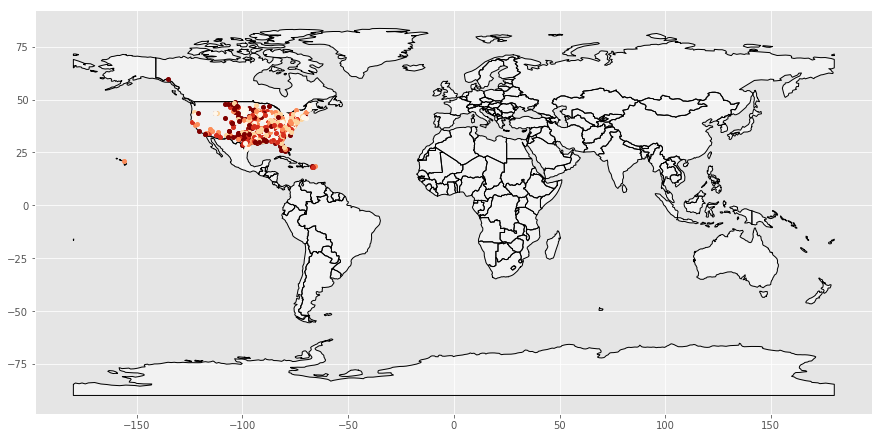

In [15]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.family'] = 'sans-serif'

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

base = world.plot(color='white', edgecolor='black')

# don't plot all the 40000 storm events, it will take very long
# the geoplot is only "interactive" for a few hundred to 3-4 thousand points
# stormloc.plot(ax=base, marker='o', column='RANGE', cmap='plasma', markersize=4);

# instead we can sample a smaller number of them randomly
stormloc_500 = stormloc.sample(n=500)
stormloc_500.plot(ax=base, marker='o', column='RANGE', cmap='OrRd', scheme="quantiles", markersize=4);

## Exercise

Merge the Fatalities with the Locations and overall storm details by linking via single Events (EVENT_ID) and storm episodes (EPISODE_ID).

Each episode consists of several events, which are located and for which the fatalities were recorded.

Good luck.
